In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Importing and cleaning the DB for the EDA

---




In [2]:
'''IMPORTANT: I uploaded the dataset to my Google Drive in order to use it.
The original dataset can be found here: https://www.kaggle.com/datasets/edersoncorbari/pip-neo-big-five-personality-120-item-version/data'''
# Load the dataset into a pandas DataFrame
df = pd.read_csv('drive\url')
# Print information about the DataFrame, including column data types and non-null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410376 entries, 0 to 410375
Columns: 165 entries, case to facet_vulnerability
dtypes: float64(35), int64(129), object(1)
memory usage: 516.6+ MB
None


In [3]:
# Printing as a list due to the large amount of columns, in order to get rid of individual items.
# We are getting rid of individual items because we are only interested in the computed scores for the facets and dimensions of the Big Five.
print(df.columns.tolist())

['case', 'sex', 'age', 'sec', 'min', 'hour', 'day', 'month', 'year', 'country', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'i10', 'i11', 'i12', 'i13', 'i14', 'i15', 'i16', 'i17', 'i18', 'i19', 'i20', 'i21', 'i22', 'i23', 'i24', 'i25', 'i26', 'i27', 'i28', 'i29', 'i30', 'i31', 'i32', 'i33', 'i34', 'i35', 'i36', 'i37', 'i38', 'i39', 'i40', 'i41', 'i42', 'i43', 'i44', 'i45', 'i46', 'i47', 'i48', 'i49', 'i50', 'i51', 'i52', 'i53', 'i54', 'i55', 'i56', 'i57', 'i58', 'i59', 'i60', 'i61', 'i62', 'i63', 'i64', 'i65', 'i66', 'i67', 'i68', 'i69', 'i70', 'i71', 'i72', 'i73', 'i74', 'i75', 'i76', 'i77', 'i78', 'i79', 'i80', 'i81', 'i82', 'i83', 'i84', 'i85', 'i86', 'i87', 'i88', 'i89', 'i90', 'i91', 'i92', 'i93', 'i94', 'i95', 'i96', 'i97', 'i98', 'i99', 'i100', 'i101', 'i102', 'i103', 'i104', 'i105', 'i106', 'i107', 'i108', 'i109', 'i110', 'i111', 'i112', 'i113', 'i114', 'i115', 'i116', 'i117', 'i118', 'i119', 'i120', 'openness', 'facet_imagination', 'facet_artistic_interests', 'facet_

In [4]:
# Create a list of the columns to drop. The individual item responses are not needed for this analysis.
columns_to_drop = [f'i{j}' for j in range(1, 121)] + ['case', 'sec', 'min', 'hour', 'day', 'month', 'year']

# Create a new DataFrame by dropping the specified columns
df_filtered = df.drop(columns=columns_to_drop)

# Display the first few rows of the new DataFrame to verify
display(df_filtered.head())

,sex,age,country,openness,facet_imagination,facet_artistic_interests,facet_emotionality,facet_adventurousness,facet_intellect,facet_liberalism,...,facet_cooperation,facet_modesty,facet_sympathy,neuroticism,facet_anxiety,facet_anger,facet_depression,facet_self_consciousness,facet_immoderation,facet_vulnerability
0,2,19,South Afr,64.796448,75.254232,40.432058,73.068513,71.832186,59.478950,36.369613,...,76.776519,74.954334,77.384533,35.573367,27.993157,11.549711,58.018551,39.725121,96.864432,11.048211
1,2,22,USA,79.613711,64.308584,61.025761,31.735332,88.251745,57.360264,92.935640,...,4.270395,69.646885,67.981348,66.998550,58.854938,89.843818,89.880570,57.486716,1.000000,80.327511
2,1,13,USA,64.261833,53.844029,45.316184,3.200967,90.676932,74.703513,90.450637,...,3.278791,24.018170,12.400848,22.577376,33.979027,86.802916,29.000871,7.509259,6.890607,15.131043
3,2,18,USA,55.968730,8.914197,60.988360,49.758720,81.244372,86.121119,25.431828,...,52.320264,38.542547,41.268613,12.466800,12.195029,57.719898,18.108659,8.870845,44.831762,5.285188
4,2,24,USA,55.117886,53.832540,61.025761,44.585253,41.349092,47.129696,69.477439,...,82.330021,50.199377,55.939489,26.353107,21.800273,7.899414,26.475441,38.817649,62.697315,53.029251


Renaming the columns to enhance workflow and graph readability

In [5]:
# Create a dictionary of new column names to replace 'facet_' with 'f_' for brevity
new_columns = {col: col.replace('facet_', 'f_') for col in df_filtered.columns}

# Rename the columns in the DataFrame in place
df_filtered.rename(columns=new_columns, inplace=True)

# Display the first few rows to verify the changes
display(df_filtered.head())

,sex,age,country,openness,f_imagination,f_artistic_interests,f_emotionality,f_adventurousness,f_intellect,f_liberalism,...,f_cooperation,f_modesty,f_sympathy,neuroticism,f_anxiety,f_anger,f_depression,f_self_consciousness,f_immoderation,f_vulnerability
0,2,19,South Afr,64.796448,75.254232,40.432058,73.068513,71.832186,59.478950,36.369613,...,76.776519,74.954334,77.384533,35.573367,27.993157,11.549711,58.018551,39.725121,96.864432,11.048211
1,2,22,USA,79.613711,64.308584,61.025761,31.735332,88.251745,57.360264,92.935640,...,4.270395,69.646885,67.981348,66.998550,58.854938,89.843818,89.880570,57.486716,1.000000,80.327511
2,1,13,USA,64.261833,53.844029,45.316184,3.200967,90.676932,74.703513,90.450637,...,3.278791,24.018170,12.400848,22.577376,33.979027,86.802916,29.000871,7.509259,6.890607,15.131043
3,2,18,USA,55.968730,8.914197,60.988360,49.758720,81.244372,86.121119,25.431828,...,52.320264,38.542547,41.268613,12.466800,12.195029,57.719898,18.108659,8.870845,44.831762,5.285188
4,2,24,USA,55.117886,53.832540,61.025761,44.585253,41.349092,47.129696,69.477439,...,82.330021,50.199377,55.939489,26.353107,21.800273,7.899414,26.475441,38.817649,62.697315,53.029251


Cleaning Data

In [6]:
# Check for missing values in each column of the filtered DataFrame
missing_values = df_filtered.isnull().sum()

# Display the number of missing values per column
print("Missing values per column:")
print(missing_values)

Missing values per column:
sex                         0
age                         0
country                   208
openness                    0
f_imagination               0
f_artistic_interests        0
f_emotionality              0
f_adventurousness           0
f_intellect                 0
f_liberalism                0
conscientiousness           0
f_self_efficacy             0
f_orderliness               0
f_dutifulness               0
f_achievement_striving      0
f_self_discipline           0
f_cautiousness              0
extraversion                0
f_friendliness              0
f_gregariousness            0
f_assertiveness             0
f_activity_level            0
f_excitement_seeking        0
f_cheerfulness              0
agreeableness               0
f_trust                     0
f_morality                  0
f_altruism                  0
f_cooperation               0
f_modesty                   0
f_sympathy                  0
neuroticism                 0
f_anxiety    

In [7]:
# Drop rows where 'country' is missing, as country is needed for geographical analysis.
df_cleaned = df_filtered.dropna(subset=['country']).copy()

# Display the shape of the DataFrame before and after dropping missing values to see how many rows were removed.
print(f"Shape before dropping missing values: {df_filtered.shape}")
print(f"Shape after dropping missing values: {df_cleaned.shape}")

# Display the number of missing values in 'country' in the new DataFrame to verify that they were dropped.
print("\nMissing values in 'country' after dropping:")
print(df_cleaned['country'].isnull().sum())

Shape before dropping missing values: (410376, 38)
Shape after dropping missing values: (410168, 38)

Missing values in 'country' after dropping:
0


In [8]:
# Check for duplicate rows and store the boolean Series to identify which rows are duplicates
duplicate_rows = df_cleaned.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

print(f"Number of duplicate rows: {num_duplicates}")

# Display the duplicate rows if any exist to inspect them.
if num_duplicates > 0:
    print("\nExamples of duplicate rows:")
    # Display the first few duplicate rows. Since duplicated marks the second and subsequent occurrences,
    # we are showing the second occurrences here. To see all occurrences including the first,
    # we could use keep=False in duplicated().
    display(df_cleaned[duplicate_rows].head())

Number of duplicate rows: 70

Examples of duplicate rows:


,sex,age,country,openness,f_imagination,f_artistic_interests,f_emotionality,f_adventurousness,f_intellect,f_liberalism,...,f_cooperation,f_modesty,f_sympathy,neuroticism,f_anxiety,f_anger,f_depression,f_self_consciousness,f_immoderation,f_vulnerability
6640,1,42,Canada,41.743771,82.882650,33.811406,19.540779,42.883369,45.853984,40.632226,...,22.950999,29.662384,36.566099,47.538074,61.989964,44.875106,60.939566,41.678526,28.223779,52.017981
28622,1,20,Philippin,27.767831,10.954730,45.316184,24.099353,51.801618,45.227473,40.399005,...,52.371791,49.909673,60.967521,37.006436,33.979027,80.717751,36.908355,37.303440,13.708788,33.140823
32535,2,20,Philippin,64.796448,75.254232,87.624597,26.499526,81.244372,29.660146,47.997134,...,89.720670,38.542547,41.268613,42.253828,46.954032,17.712549,32.943919,89.880714,44.831762,36.809286
32857,2,19,Philippin,49.969942,17.403379,79.837454,37.806554,39.633203,29.660146,89.614218,...,76.776519,21.344785,94.491314,42.253828,66.339344,32.543834,18.108659,67.280353,55.597358,36.809286
32861,2,21,Philippin,34.840414,23.206265,61.025761,70.476957,71.676549,11.181812,20.397416,...,64.356031,78.467750,95.260081,64.900640,91.113568,60.949407,51.835910,21.580248,62.697315,71.893590


In [9]:
# Drop duplicate rows from the DataFrame, keeping the first occurrence to ensure uniqueness
df_cleaned = df_cleaned.drop_duplicates().copy()

# Check for duplicate rows again to verify that they have been removed.
duplicate_rows_after_drop = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows after dropping: {duplicate_rows_after_drop}")

# Display the shape of the DataFrame after dropping duplicates to see the final number of rows.
print(f"Shape after dropping duplicates: {df_cleaned.shape}")

Number of duplicate rows after dropping: 0
Shape after dropping duplicates: (410098, 38)


In [10]:
# Check the data types of each column to ensure they are appropriate for analysis.
print("Data types of columns:")
print(df_cleaned.dtypes)

Data types of columns:
sex                         int64
age                         int64
country                    object
openness                  float64
f_imagination             float64
f_artistic_interests      float64
f_emotionality            float64
f_adventurousness         float64
f_intellect               float64
f_liberalism              float64
conscientiousness         float64
f_self_efficacy           float64
f_orderliness             float64
f_dutifulness             float64
f_achievement_striving    float64
f_self_discipline         float64
f_cautiousness            float64
extraversion              float64
f_friendliness            float64
f_gregariousness          float64
f_assertiveness           float64
f_activity_level          float64
f_excitement_seeking      float64
f_cheerfulness            float64
agreeableness             float64
f_trust                   float64
f_morality                float64
f_altruism                float64
f_cooperation            

EDA WITH PYTHON (STEP 4 IN THE PROJECT DOCUMENT)

In [11]:
#Age Filtering (Preprocessing Step, see description in Project Document)
# Check the minimum age in the dataset to understand the age range of participants.
min_age = df_cleaned['age'].min()
print(f"Minimum age in the dataset: {min_age}")

# Filter the DataFrame to include only applicants aged 18 and above, based on the project requirements.
df_age_cleaned = df_cleaned[df_cleaned['age'] >= 18].copy()

# Display the shape of the DataFrame after filtering by age to see how many participants are included.
print(f"Shape after filtering by age: {df_age_cleaned.shape}")

# Verify the minimum age in the filtered DataFrame to confirm the filtering was successful.
min_age_filtered = df_age_cleaned['age'].min()
print(f"Minimum age in the filtered dataset: {min_age_filtered}")

Minimum age in the dataset: 10
Shape after filtering by age: (339711, 38)
Minimum age in the filtered dataset: 18


In [12]:
#Flagging extreme endpoints (0 or 100)
# Select only the numeric columns from the DataFrame to check for extreme values in scores.
numeric_cols = df_age_cleaned.select_dtypes(include=np.number).columns

# Initialize a dictionary to store the counts of 0 and 100 for each column.
extreme_values_counts = {}

# Iterate through each numeric column
for col in numeric_cols:
    # Count occurrences of 0 and 100
    count_0 = (df_age_cleaned[col] == 0).sum()
    count_100 = (df_age_cleaned[col] == 100).sum()

    # Store the counts if they are greater than 0
    if count_0 > 0 or count_100 > 0:
        extreme_values_counts[col] = {'count_0': count_0, 'count_100': count_100}

# Display the results, showing columns with occurrences of absolute 0 or 100.
if extreme_values_counts:
    print("Occurrences of absolute 0 and 100 in numeric columns (for values > 0):")
    for col, counts in extreme_values_counts.items():
        if counts['count_0'] > 0 and counts['count_100'] > 0:
            print(f"- Column '{col}': {counts['count_0']} occurrences of 0, {counts['count_100']} occurrences of 100")
        elif counts['count_0'] > 0:
            print(f"- Column '{col}': {counts['count_0']} occurrences of 0")
        elif counts['count_100'] > 0:
            print(f"- Column '{col}': {counts['count_100']} occurrences of 100")
else:
    print("No absolute 0 or 100 values found in numeric columns.")

No absolute 0 or 100 values found in numeric columns.


In [13]:
# Renaming the DataFrame to improve the workflow with a more descriptive name.
df_ready = df_age_cleaned.copy()

# Display the first few rows of the new DataFrame to verify the renaming and content.
display(df_ready.head())

,sex,age,country,openness,f_imagination,f_artistic_interests,f_emotionality,f_adventurousness,f_intellect,f_liberalism,...,f_cooperation,f_modesty,f_sympathy,neuroticism,f_anxiety,f_anger,f_depression,f_self_consciousness,f_immoderation,f_vulnerability
0,2,19,South Afr,64.796448,75.254232,40.432058,73.068513,71.832186,59.478950,36.369613,...,76.776519,74.954334,77.384533,35.573367,27.993157,11.549711,58.018551,39.725121,96.864432,11.048211
1,2,22,USA,79.613711,64.308584,61.025761,31.735332,88.251745,57.360264,92.935640,...,4.270395,69.646885,67.981348,66.998550,58.854938,89.843818,89.880570,57.486716,1.000000,80.327511
3,2,18,USA,55.968730,8.914197,60.988360,49.758720,81.244372,86.121119,25.431828,...,52.320264,38.542547,41.268613,12.466800,12.195029,57.719898,18.108659,8.870845,44.831762,5.285188
4,2,24,USA,55.117886,53.832540,61.025761,44.585253,41.349092,47.129696,69.477439,...,82.330021,50.199377,55.939489,26.353107,21.800273,7.899414,26.475441,38.817649,62.697315,53.029251
5,2,20,USA,26.761325,3.021655,70.825749,61.723536,29.170736,49.391656,7.983541,...,52.320264,8.000591,18.490918,64.820778,66.339344,73.862903,32.943919,58.257428,84.677109,46.924899


# Plotting
Analyze the distributions of all columns in the dataframe `df_ready` that start with 'f_' by plotting their Frequency Polygon on a single chart with overlapping lines.

## Identify facet columns

### Subtask:
Create a list of all columns in `df_ready` that start with 'f_'.


**Reasoning**:
Iterate through the columns of the `df_ready` DataFrame, check if each column name starts with the prefix 'f_', collect all column names that satisfy the condition into a list, and print the list.



In [14]:
# Create a list of columns that start with 'f_' to easily select facet-specific columns.
facet_columns = [col for col in df_ready.columns if col.startswith('f_')]

# Print the list of facet columns to see which columns are included in this analysis.
print("Facet columns:")
print(facet_columns)

Facet columns:
['f_imagination', 'f_artistic_interests', 'f_emotionality', 'f_adventurousness', 'f_intellect', 'f_liberalism', 'f_self_efficacy', 'f_orderliness', 'f_dutifulness', 'f_achievement_striving', 'f_self_discipline', 'f_cautiousness', 'f_friendliness', 'f_gregariousness', 'f_assertiveness', 'f_activity_level', 'f_excitement_seeking', 'f_cheerfulness', 'f_trust', 'f_morality', 'f_altruism', 'f_cooperation', 'f_modesty', 'f_sympathy', 'f_anxiety', 'f_anger', 'f_depression', 'f_self_consciousness', 'f_immoderation', 'f_vulnerability']


## Create and display plot


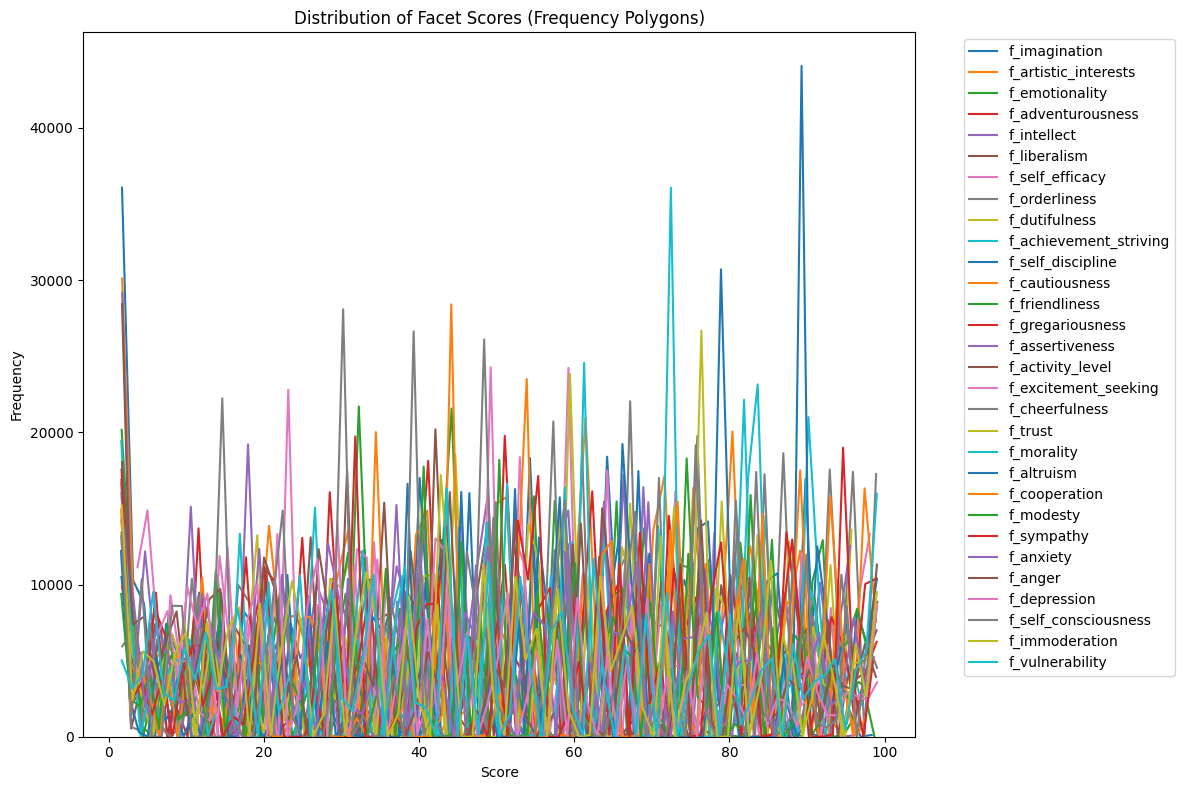

In [15]:
# Create a figure and axes for the plot to prepare for plotting.
plt.figure(figsize=(12, 8))

# Iterate through each facet column and plot its frequency polygon to visualize the distribution of scores.
for col in facet_columns:
    sns.histplot(data=df_ready, x=col, label=col, kde=False, element="poly", fill=False)

# Set the title and labels for clarity
plt.title('Distribution of Facet Scores (Frequency Polygons)')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Add a legend outside the plot to identify each line.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent the legend from being cut off.
plt.tight_layout()

# Display the plot.
plt.show()

In [16]:
#Finding out which facet has the highest frequency score in the plot
max_frequency = 0
facet_with_max_frequency = None

for col in facet_columns:
    # Calculate the histogram bins and counts to find frequency distribution.
    counts, bins = np.histogram(df_ready[col], bins='auto') # Using 'auto' lets numpy determine the bin edges

    # Find the maximum frequency in the current facet's histogram.
    current_max_frequency = np.max(counts)

    # Check if this maximum frequency is greater than the overall maximum found so far and update if necessary.
    if current_max_frequency > max_frequency:
        max_frequency = current_max_frequency
        facet_with_max_frequency = col

# Print the facet with the greatest frequency and its maximum frequency.
print(f"The facet with the greatest frequency in any given score is '{facet_with_max_frequency}' with a maximum frequency of {max_frequency}.")

The facet with the greatest frequency in any given score is 'f_altruism' with a maximum frequency of 44078.


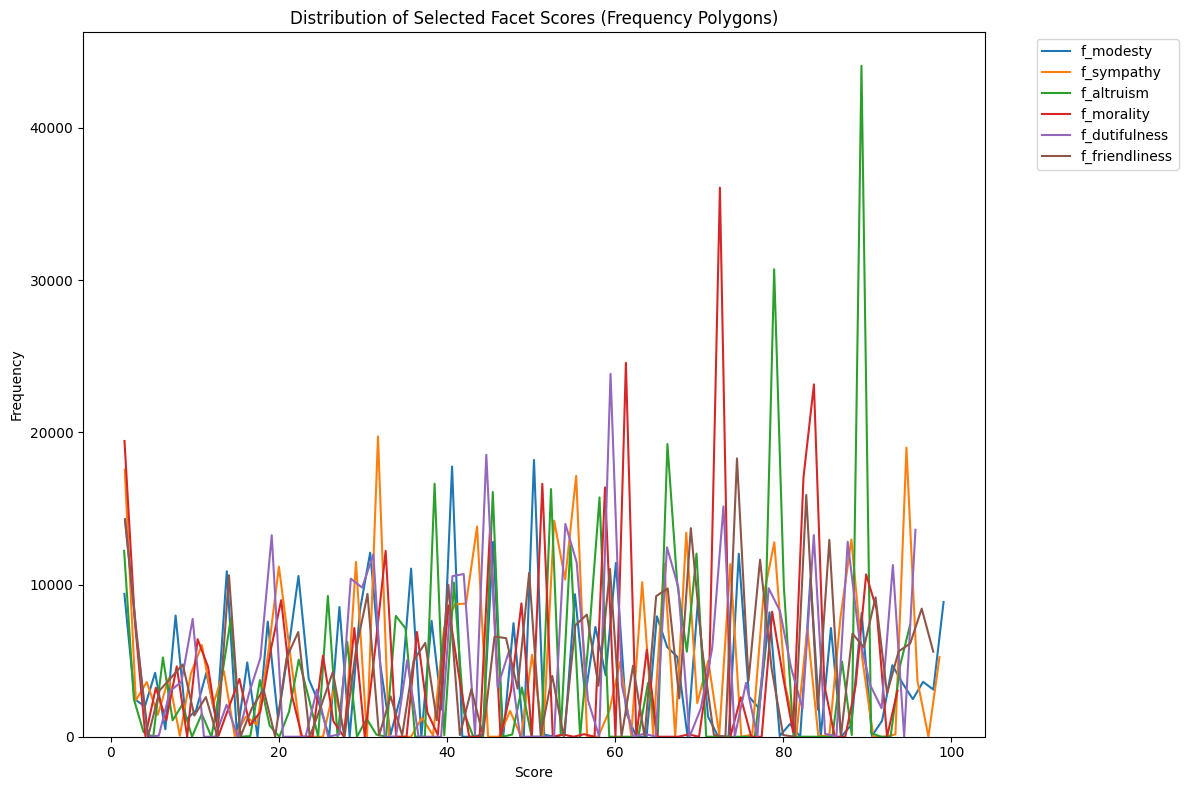

In [17]:
#Plotting the 6 highly related facets according to step 2 of the project document (Analyzing the facets and selecting the strongest facets as the best indicator for analysis (±2))
# Define the list of facet columns to plot based on the project document.
selected_facet_columns = ['f_modesty', 'f_sympathy', 'f_altruism', 'f_morality', 'f_dutifulness', 'f_friendliness']

# Create a figure and axes for the plot.
plt.figure(figsize=(12, 8))

# Iterate through each selected facet column and plot its frequency polygon to visualize their distributions together.
for col in selected_facet_columns:
    sns.histplot(data=df_ready, x=col, label=col, kde=False, element="poly", fill=False)

# Set the title and labels for clarity.
plt.title('Distribution of Selected Facet Scores (Frequency Polygons)')
plt.xlabel('Score')
plt.ylabel('Frequency')

# Add a legend outside the plot to identify each line.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent the legend from being cut off.
plt.tight_layout()

# Display the plot.
plt.show()

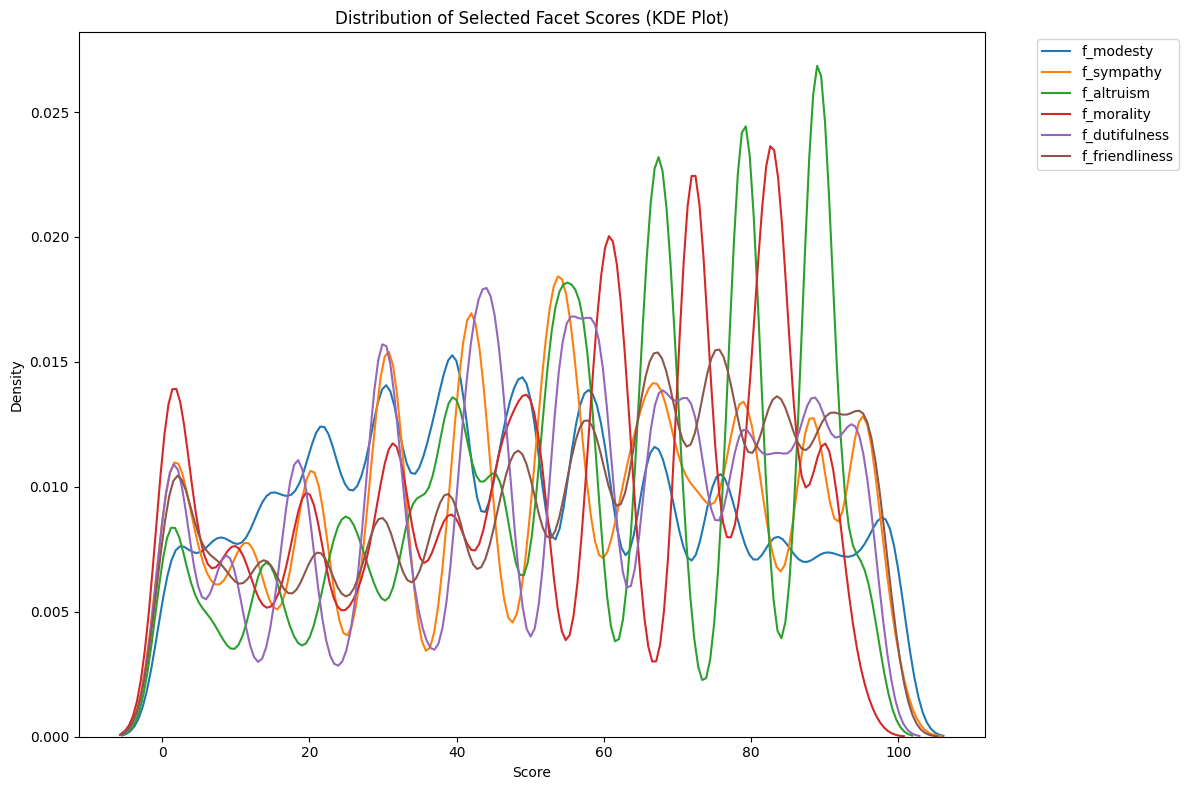

In [18]:
# Create a figure and axes for the plot.
plt.figure(figsize=(12, 8))

# Iterate through each selected facet column and plot its KDE plot to visualize the density distribution smoothly.
for col in selected_facet_columns:
    sns.kdeplot(data=df_ready, x=col, label=col, fill=False)

# Set the title and labels for clarity.
plt.title('Distribution of Selected Facet Scores (KDE Plot)')
plt.xlabel('Score')
plt.ylabel('Density')

# Add a legend outside the plot to identify each line.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent the legend from being cut off.
plt.tight_layout()

# Display the plot.
plt.show()

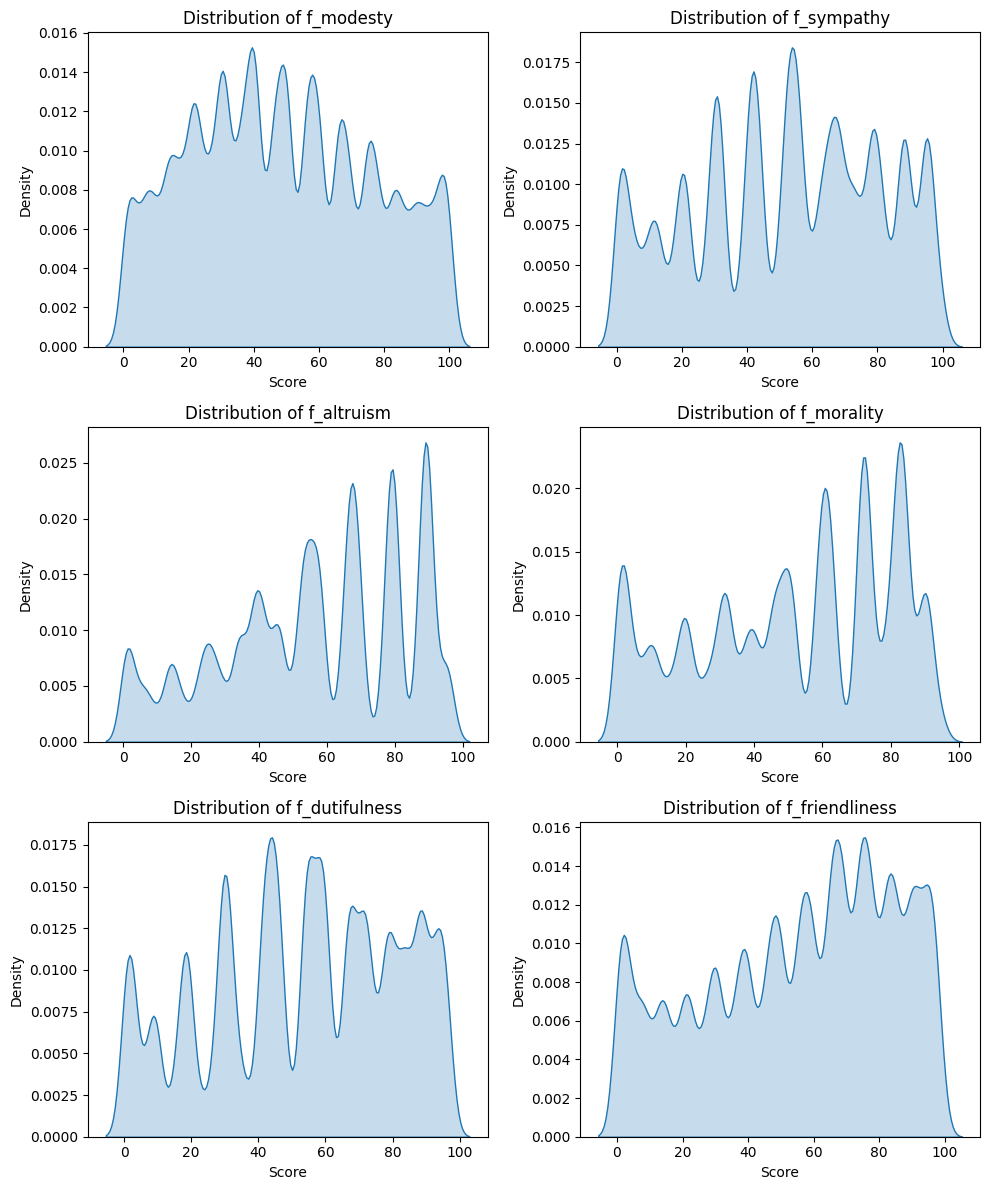

In [19]:
# Create subplots for each facet column to show individual KDE plots.
n_cols = 2
n_rows = (len(selected_facet_columns) + n_cols - 1) // n_cols # Calculate the number of rows needed based on the number of selected facets and columns.

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4 * n_rows))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration.

# Iterate through each selected facet column and plot its KDE plot on a separate subplot.
for i, col in enumerate(selected_facet_columns):
    sns.kdeplot(data=df_ready, x=col, ax=axes[i], fill=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('Density')

# Remove any unused subplots if the number of facets is not a multiple of the number of columns.
for j in range(len(selected_facet_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping titles or labels.
plt.tight_layout()
# Display the plot.
plt.show()

Spearman Correlation Matrix (Selected Facet Columns):


,f_modesty,f_sympathy,f_altruism,f_morality,f_dutifulness,f_friendliness
f_modesty,1.000000,0.146924,0.138719,0.269987,0.081397,-0.131829
f_sympathy,0.146924,1.000000,0.543926,0.266112,0.142316,0.178569
f_altruism,0.138719,0.543926,1.000000,0.379360,0.302075,0.343410
f_morality,0.269987,0.266112,0.379360,1.000000,0.483864,0.130382
f_dutifulness,0.081397,0.142316,0.302075,0.483864,1.000000,0.155783
f_friendliness,-0.131829,0.178569,0.343410,0.130382,0.155783,1.000000


Spearman Correlation P-values (Selected Facet Columns):


,f_modesty,f_sympathy,f_altruism,f_morality,f_dutifulness,f_friendliness
f_modesty,0.0,0.0,0.0,0.0,0.0,0.0
f_sympathy,0.0,0.0,0.0,0.0,0.0,0.0
f_altruism,0.0,0.0,0.0,0.0,0.0,0.0
f_morality,0.0,0.0,0.0,0.0,0.0,0.0
f_dutifulness,0.0,0.0,0.0,0.0,0.0,0.0
f_friendliness,0.0,0.0,0.0,0.0,0.0,0.0


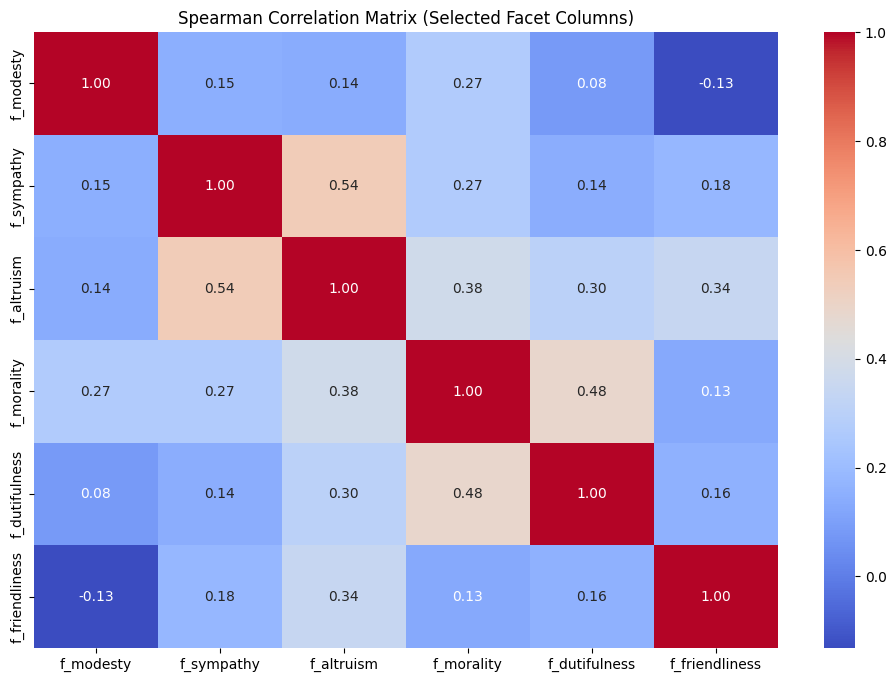

In [20]:
# Calculate the Spearman correlation matrix and p-values for the selected facet columns.
# Spearman correlation is used because the data might not be normally distributed.
spearman_corr_results = df_ready[selected_facet_columns].corr(method='spearman', numeric_only=False)

# The corr() method with method='spearman' in pandas does not directly return p-values.
# We need to calculate them manually or use a function that provides them.
# A common way is to use scipy.stats.spearmanr which returns both correlation and p-value.

from scipy.stats import spearmanr

# Initialize a matrix to store p-values with the same shape as the correlation matrix.
spearman_p_values = pd.DataFrame(index=selected_facet_columns, columns=selected_facet_columns)

# Calculate p-values for each pair of columns using spearmanr.
for col1 in selected_facet_columns:
    for col2 in selected_facet_columns:
        if col1 == col2:
            spearman_p_values.loc[col1, col2] = 0.0 # p-value is 0 for correlation of a variable with itself.
        else:
            try:
                # spearmanr returns correlation and p-value. nan_policy='omit' handles missing values.
                corr, p_value = spearmanr(df_ready[col1], df_ready[col2], nan_policy='omit')
                spearman_p_values.loc[col1, col2] = p_value
            except ValueError:
                spearman_p_values.loc[col1, col2] = np.nan # Handle cases with insufficient data.


# Convert to float to ensure heatmap works correctly with numerical data.
spearman_p_values = spearman_p_values.astype(float)

# Display the Spearman correlation matrix as a table.
print("Spearman Correlation Matrix (Selected Facet Columns):")
display(spearman_corr_results)

# Display the p-value matrix to assess the statistical significance of the correlations.
print("Spearman Correlation P-values (Selected Facet Columns):")
display(spearman_p_values)

# Visualize the Spearman correlation matrix with a heatmap for better understanding of relationships.
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr_results, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Matrix (Selected Facet Columns)")
plt.show()

In [21]:
from scipy.stats import skew

# Calculate the skewness for each of the selected facet columns to understand the symmetry of their distributions.
for col in selected_facet_columns:
    current_skewness = skew(df_ready[col])
    print(f"Skewness of {col}: {current_skewness}")

Skewness of f_modesty: 0.1372051480331306
Skewness of f_sympathy: -0.17197947732724284
Skewness of f_altruism: -0.3997916872620112
Skewness of f_morality: -0.3379083396829463
Skewness of f_dutifulness: -0.2647420275496774
Skewness of f_friendliness: -0.36927620475064843


In [22]:
# Calculate descriptive statistics for selected facet columns to get a summary of their distributions.
print("Descriptive Statistics for Selected Facet Columns:")

for col in selected_facet_columns:
    print(f"\n--- {col} ---")
    # Calculate Mode (can be multiple) to find the most frequent value(s).
    mode_values = df_ready[col].mode()
    print(f"Mode: {mode_values.tolist()}") # .tolist() to handle multiple modes nicely

    # Calculate Median (50th percentile) to find the middle value.
    median_value = df_ready[col].median()
    print(f"Median: {median_value}")

    # Calculate Percentiles (e.g., 25th, 50th, 75th) to understand the spread of data.
    percentiles = df_ready[col].quantile([0.25, 0.5, 0.75])
    print("Percentiles:")
    print(percentiles)

Descriptive Statistics for Selected Facet Columns:

--- f_modesty ---
Mode: [40.286480734408485]
Median: 47.84085666127538
Percentiles:
0.25    26.629083
0.50    47.840857
0.75    69.646885
Name: f_modesty, dtype: float64

--- f_sympathy ---
Mode: [55.93948914715503]
Median: 53.75620029281089
Percentiles:
0.25    31.274796
0.50    53.756200
0.75    77.219972
Name: f_sympathy, dtype: float64

--- f_altruism ---
Mode: [89.44823275102681]
Median: 57.65124629516976
Percentiles:
0.25    38.694737
0.50    57.651246
0.75    79.050952
Name: f_altruism, dtype: float64

--- f_morality ---
Mode: [83.40590009552216]
Median: 58.95573038405939
Percentiles:
0.25    29.005454
0.50    58.955730
0.75    72.419913
Name: f_morality, dtype: float64

--- f_dutifulness ---
Mode: [44.96360983667756]
Median: 54.8928571308723
Percentiles:
0.25    31.359945
0.50    54.892857
0.75    78.307977
Name: f_dutifulness, dtype: float64

--- f_friendliness ---
Mode: [68.55200932169936]
Median: 59.19022896823429
Percentil

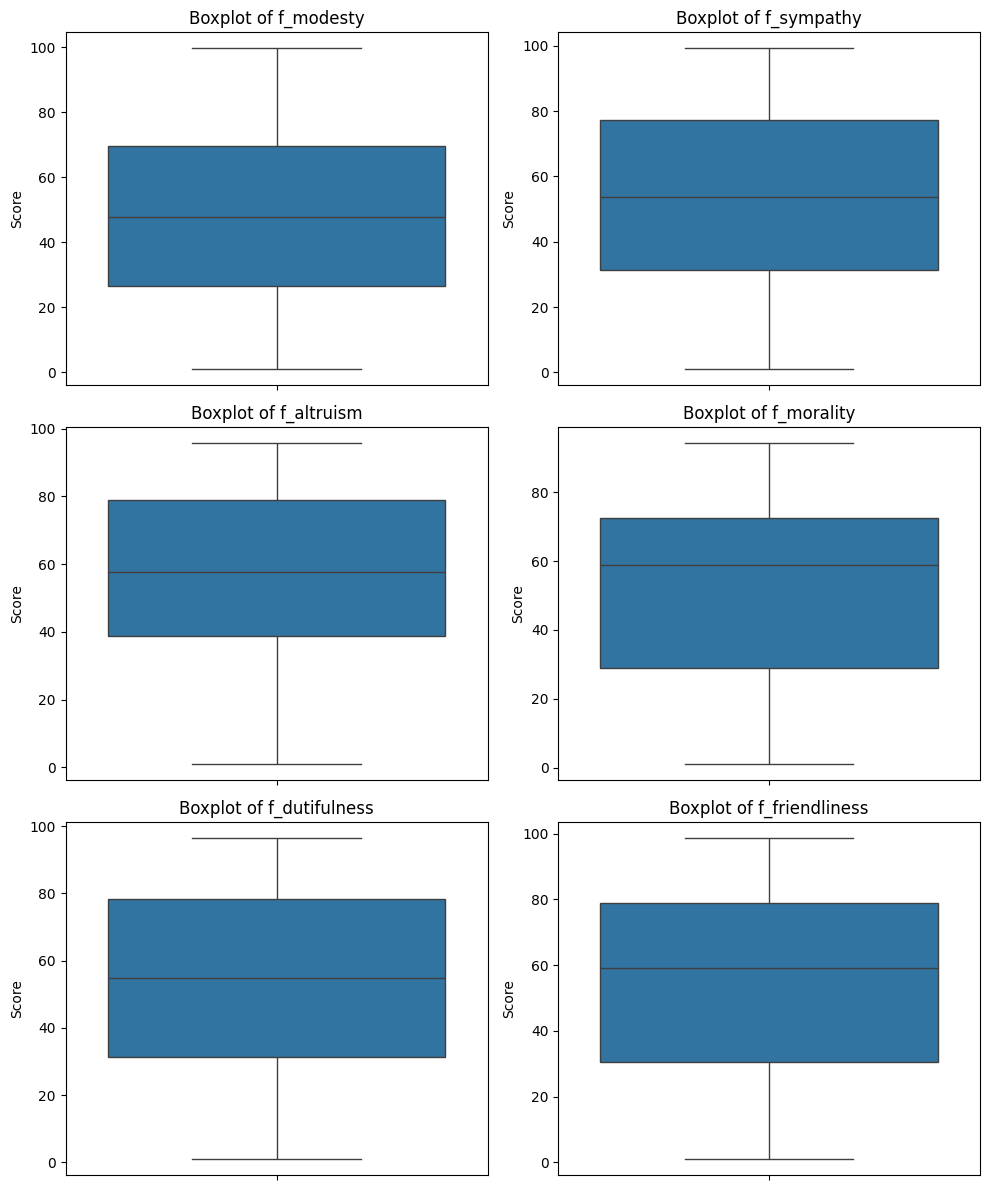

In [23]:
# Create subplots for each facet column to visualize their boxplots individually.
n_cols = 2
n_rows = (len(selected_facet_columns) + n_cols - 1) // n_cols # Calculate the number of rows needed.

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4 * n_rows))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration.

# Iterate through each selected facet column and plot its boxplot on a separate subplot to identify potential outliers and the distribution spread.
for i, col in enumerate(selected_facet_columns):
    sns.boxplot(data=df_ready, y=col, ax=axes[i]) # Using y=col for vertical boxplots.
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel('Score')

# Remove any unused subplots.
for j in range(len(selected_facet_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping elements.
plt.tight_layout()
# Display the plot.
plt.show()

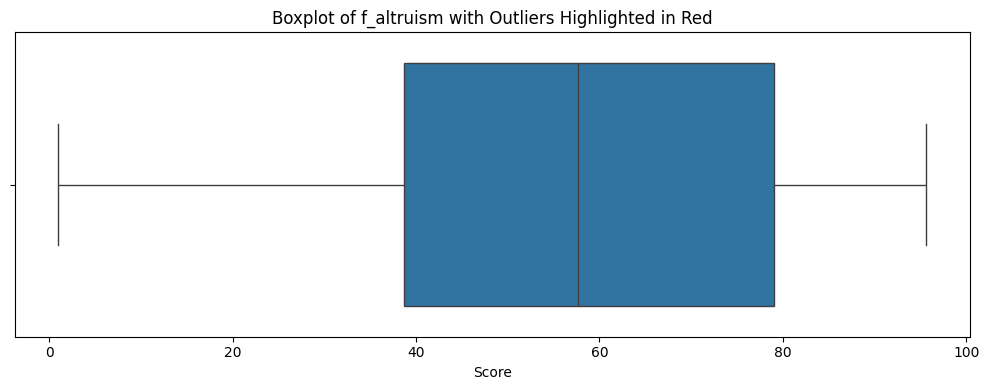

In [24]:
# Create a single figure and axes for the boxplot of 'f_altruism' to focus on this specific facet.
plt.figure(figsize=(10, 4))

# Define properties for the outlier points (fliers) to highlight them in red.
flierprops = dict(marker='o', markerfacecolor='red', markersize=5,
                  linestyle='none')

# Plot the boxplot for 'f_altruism' with red outliers to visualize the distribution and outliers.
sns.boxplot(data=df_ready, x='f_altruism', flierprops=flierprops) # Using x='f_altruism' for a single horizontal boxplot.

# Set the title and labels for clarity.
plt.title('Boxplot of f_altruism with Outliers Highlighted in Red')
plt.xlabel('Score')
plt.ylabel('') # Remove y label as it's now the score axis.

# Adjust layout.
plt.tight_layout()
# Display the plot.
plt.show()

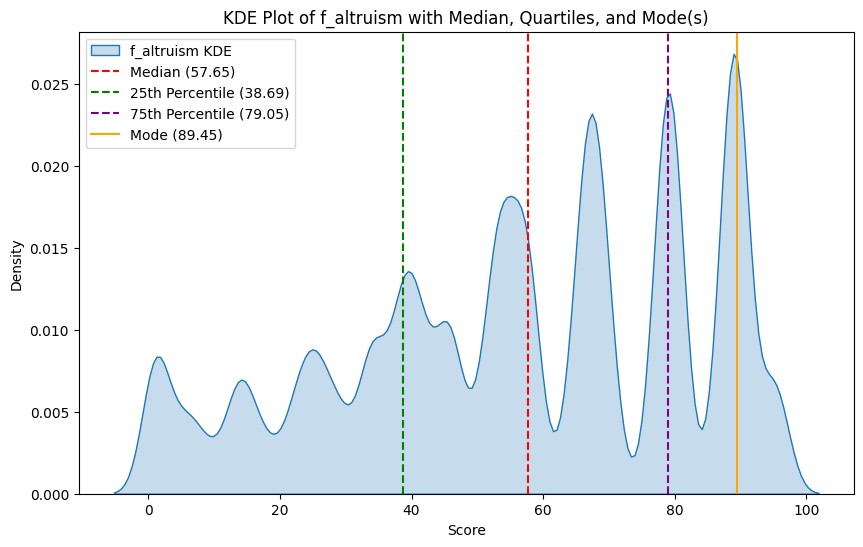

In [25]:
# Get the median and quartile values for 'f_altruism' from the previous calculation to add them to the plot.
median_altruism = df_ready['f_altruism'].median()
quartiles_altruism = df_ready['f_altruism'].quantile([0.25, 0.75])

# Calculate the mode for 'f_altruism' to add to the plot.
mode_altruism = df_ready['f_altruism'].mode()

# Create a figure and axes for the plot.
plt.figure(figsize=(10, 6))

# Plot the KDE for 'f_altruism' to show the density distribution.
sns.kdeplot(data=df_ready, x='f_altruism', fill=True, label='f_altruism KDE')

# Add vertical lines for median and quartiles to indicate key statistical measures.
plt.axvline(median_altruism, color='red', linestyle='--', label=f'Median ({median_altruism:.2f})')
plt.axvline(quartiles_altruism[0.25], color='green', linestyle='--', label=f'25th Percentile ({quartiles_altruism[0.25]:.2f})')
plt.axvline(quartiles_altruism[0.75], color='purple', linestyle='--', label=f'75th Percentile ({quartiles_altruism[0.75]:.2f})')

# Add vertical line(s) for the mode(s).
for mode_val in mode_altruism:
    plt.axvline(mode_val, color='orange', linestyle='-', label=f'Mode ({mode_val:.2f})' if len(mode_altruism) == 1 else f'Mode ({mode_val:.2f})')

# Set the title and labels.
plt.title('KDE Plot of f_altruism with Median, Quartiles, and Mode(s)')
plt.xlabel('Score')
plt.ylabel('Density')

# Add a legend to explain the lines.
plt.legend()

# Display the plot.
plt.show()

According to the research made and explained in the Project Document, the IPIP-NEO and the NEO PI-R/NEO-PI-3 manuals classify the lowest 20% of scores as “low” and label them with the facet’s opposite trait. So we will determine the lowest 20% of each score to determine the opposites, and from there, we will calculate the amount of the population that shows those scores to determine how common Narcissistic traits are in the population.

In [26]:
# Calculate the 20th percentile for each of the selected facet columns.
# This is used to identify the "low" scores according to the project document.
lowest_quintiles = df_ready[selected_facet_columns].quantile(0.20)

print("Lowest Quintile (20th percentile) for each selected facet:")
print(lowest_quintiles)

Lowest Quintile (20th percentile) for each selected facet:
f_modesty         21.866767
f_sympathy        21.651269
f_altruism        33.581970
f_morality        20.042978
f_dutifulness     28.947529
f_friendliness    26.456143
Name: 0.2, dtype: float64


In [27]:
# Calculate the percentage of the population scoring lower than the lowest quintile for each selected facet.
# This helps understand how common "low" scores are for each facet.
population_percentage_below_quintile = {}

for col in selected_facet_columns:
    # Get the lowest quintile value for the current facet.
    quintile_value = lowest_quintiles[col]

    # Count the number of individuals scoring below the quintile value.
    count_below_quintile = (df_ready[col] < quintile_value).sum()

    # Calculate the percentage.
    percentage = (count_below_quintile / len(df_ready)) * 100

    # Store the result.
    population_percentage_below_quintile[col] = percentage

print("Percentage of population scoring lower than the lowest quintile for each selected facet:")
for col, percentage in population_percentage_below_quintile.items():
    print(f"- {col}: {percentage:.2f}%")

Percentage of population scoring lower than the lowest quintile for each selected facet:
- f_modesty: 19.06%
- f_sympathy: 18.86%
- f_altruism: 19.69%
- f_morality: 17.89%
- f_dutifulness: 18.78%
- f_friendliness: 19.55%


In [28]:
#Calculating the Percentage of population scoring below the lowest quintile for combinations of selected facets
from itertools import combinations

# Total number of individuals in the filtered DataFrame.
total_population = len(df_ready)

print("Percentage of population scoring below the lowest quintile for combinations of selected facets:")

# Iterate through combinations of different sizes (2 to 6) to see how often low scores occur together.
for i in range(2, len(selected_facet_columns) + 1):
    print(f"\n--- Combinations of {i} facets ---")
    # Generate combinations of facet columns of size i.
    for facet_combination in combinations(selected_facet_columns, i):
        # Create a boolean mask for rows where all facets in the combination are below their lowest quintile.
        condition = True
        for col in facet_combination:
            quintile_value = lowest_quintiles[col]
            condition = condition & (df_ready[col] < quintile_value)

        # Count the number of individuals satisfying the condition.
        count_below_quintile_combination = df_ready[condition].shape[0]

        # Calculate the percentage.
        percentage_combination = (count_below_quintile_combination / total_population) * 100

        # Print the result for the current combination.
        print(f"- {', '.join(facet_combination)}: {percentage_combination:.2f}%")

Percentage of population scoring below the lowest quintile for combinations of selected facets:

--- Combinations of 2 facets ---
- f_modesty, f_sympathy: 5.34%
- f_modesty, f_altruism: 5.35%
- f_modesty, f_morality: 6.33%
- f_modesty, f_dutifulness: 4.60%
- f_modesty, f_friendliness: 3.06%
- f_sympathy, f_altruism: 9.44%
- f_sympathy, f_morality: 5.69%
- f_sympathy, f_dutifulness: 4.87%
- f_sympathy, f_friendliness: 5.22%
- f_altruism, f_morality: 7.10%
- f_altruism, f_dutifulness: 6.60%
- f_altruism, f_friendliness: 7.16%
- f_morality, f_dutifulness: 8.31%
- f_morality, f_friendliness: 4.49%
- f_dutifulness, f_friendliness: 5.14%

--- Combinations of 3 facets ---
- f_modesty, f_sympathy, f_altruism: 3.07%
- f_modesty, f_sympathy, f_morality: 2.42%
- f_modesty, f_sympathy, f_dutifulness: 1.61%
- f_modesty, f_sympathy, f_friendliness: 1.23%
- f_modesty, f_altruism, f_morality: 2.76%
- f_modesty, f_altruism, f_dutifulness: 2.02%
- f_modesty, f_altruism, f_friendliness: 1.58%
- f_modesty

In [29]:
# Perform probabilistic analysis by comparing observed percentages to expected percentages under independence.
# This helps determine if the low scores in combinations are occurring more or less often than expected by chance.

print("\nProbabilistic Analysis: Observed vs. Expected Percentage (under independence)")

# Iterate through combinations of different sizes (2 to 6).
for i in range(2, len(selected_facet_columns) + 1):
    print(f"\n--- Combinations of {i} facets ---")
    # Generate combinations of facet columns of size i.
    for facet_combination in combinations(selected_facet_columns, i):
        # Calculate the observed percentage for the current combination (from previous cell's output).
        # We need to re-calculate this as it's not stored in a variable.
        condition = True
        for col in facet_combination:
            quintile_value = lowest_quintiles[col]
            condition = condition & (df_ready[col] < quintile_value)
        observed_count = df_ready[condition].shape[0]
        observed_percentage = (observed_count / total_population) * 100

        # Calculate the expected percentage under independence by multiplying the individual probabilities.
        expected_percentage = 100.0
        for col in facet_combination:
            # Get the individual facet percentage (from previous cell's output).
            individual_percentage = population_percentage_below_quintile[col]
            expected_percentage *= (individual_percentage / 100.0) # Multiply proportions

        # Print the results for the current combination.
        print(f"- {', '.join(facet_combination)}:")
        print(f"  Observed: {observed_percentage:.2f}%")
        print(f"  Expected (under independence): {expected_percentage:.2f}%")


Probabilistic Analysis: Observed vs. Expected Percentage (under independence)

--- Combinations of 2 facets ---
- f_modesty, f_sympathy:
  Observed: 5.34%
  Expected (under independence): 3.59%
- f_modesty, f_altruism:
  Observed: 5.35%
  Expected (under independence): 3.75%
- f_modesty, f_morality:
  Observed: 6.33%
  Expected (under independence): 3.41%
- f_modesty, f_dutifulness:
  Observed: 4.60%
  Expected (under independence): 3.58%
- f_modesty, f_friendliness:
  Observed: 3.06%
  Expected (under independence): 3.72%
- f_sympathy, f_altruism:
  Observed: 9.44%
  Expected (under independence): 3.71%
- f_sympathy, f_morality:
  Observed: 5.69%
  Expected (under independence): 3.37%
- f_sympathy, f_dutifulness:
  Observed: 4.87%
  Expected (under independence): 3.54%
- f_sympathy, f_friendliness:
  Observed: 5.22%
  Expected (under independence): 3.69%
- f_altruism, f_morality:
  Observed: 7.10%
  Expected (under independence): 3.52%
- f_altruism, f_dutifulness:
  Observed: 6.60%
 